In [1]:
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
import imageio as io
import os

In [3]:
%matplotlib inline

In [4]:
## 1. 데이터 불러오기
origdata = pd.read_csv('iris.csv')
origdata.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
origdata.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [11]:
### 2. 전처리
X = origdata[['PetalLengthCm', 'PetalWidthCm']]
y = origdata['Species']

y[y=='Iris-setosa'] = 0
y[y=='Iris-versicolor'] = 1
y[y=='Iris-virginica'] = 2

In [12]:
X.tail()

,PetalLengthCm,PetalWidthCm
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3
149,5.1,1.8


In [13]:
y.tail()

145    2
146    2
147    2
148    2
149    2
Name: Species, dtype: object

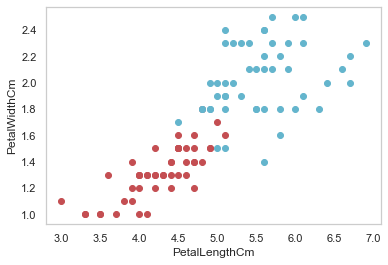

In [18]:
### 3. 데이터 확인 - 시각화
plt.figure()
setosa = y == 0
versicolor = y == 1
virginica = y == 2

plt.scatter(X.PetalLengthCm[versicolor], X.PetalWidthCm[versicolor], c='r')
plt.scatter(X.PetalLengthCm[virginica], X.PetalWidthCm[virginica], c='c')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.grid(False)
plt.show()

In [22]:
### setosa 데이터 삭제
X1 = X[y != 0]
y1 = y[y != 0]

X1.head()

,PetalLengthCm,PetalWidthCm
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


In [23]:
X1.shape, y1.shape

((100, 2), (100,))

In [24]:
X1 = X1.reset_index(drop=True)
y1 = y1.reset_index(drop=True)
y1 -= 1  ## 0, 1로 변환
print(y1.unique())
X1[:5]

[0 1]


,PetalLengthCm,PetalWidthCm
0,4.7,1.4
1,4.5,1.5
2,4.9,1.5
3,4.0,1.3
4,4.6,1.5


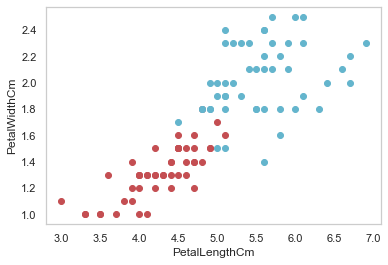

In [32]:
## 시각화 및 이미지 저장
fig = plt.figure()
plt.scatter(X1['PetalLengthCm'][y1==0], X1['PetalWidthCm'][y1==0], c='r')
plt.scatter(X1['PetalLengthCm'][y1==1], X1['PetalWidthCm'][y1==1], c='c')
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.grid(False)
fig.savefig('main.jpg', dpi=100)
plt.show()

In [30]:
X1['PetalLengthCm']

0     4.7
1     4.5
2     4.9
3     4.0
4     4.6
     ... 
95    5.2
96    5.0
97    5.2
98    5.4
99    5.1
Name: PetalLengthCm, Length: 100, dtype: float64

In [35]:
## 4. 데이터를 대상으로 Linear SVM 커널로 학습

y1 = y1.astype(dtype=np.uint8)
clf0 = LinearSVC()
clf0.fit(X1, y1)
print(clf0.coef_)
print(clf0.intercept_)

[[0.2801541  1.70097649]]
[-4.17110962]


In [37]:
LinearSVC(C=1.0, class_weight=None, dual=True, 
          fit_intercept=True, intercept_scaling=1, loss='squared_hinge', 
          max_iter=1000, multi_class='ovr', penalty='l2', random_state=None, tol=0.001, verbose=0)

LinearSVC(tol=0.001)

* decision boundary = 0.28 $x$ + 1.7 $y$ -4.17

In [38]:
xmin, xmax = X1.PetalLengthCm.min(), X1.PetalLengthCm.max()
ymin, ymax = X1.PetalWidthCm.min(), X1.PetalWidthCm.max()
stepx = (xmax - xmin) / 99
stepy = (ymax - ymin) / 99

In [41]:
a0, b0, c0 = clf0.coef_[0, 0], clf0.coef_[0, 1], clf0.intercept_

In [40]:
clf0.coef_[0, 0]

0.2801541034324406

In [42]:
# Formula for reference
# a*x + b*y + c = 0
# y = -(a*x + c)/b

lx0 = [xmin + stepx * i for i in range(100)]  # 조금씩 더해지는게 함
ly0 = [-(a0 * lx0[i] + c0) / b0 for i in range(100)]

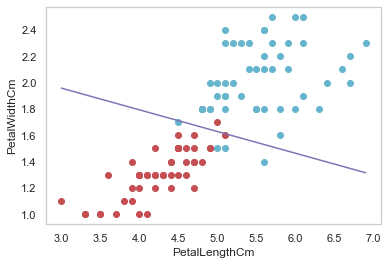

In [44]:
### decision boundary 표시
plt.figure()
plt.scatter(X1.PetalLengthCm[y1==0], X1.PetalWidthCm[y1==0], c='r')
plt.scatter(X1.PetalLengthCm[y1==1], X1.PetalWidthCm[y1==1], c='c')

plt.plot(lx0, ly0, c='m')

plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.grid(False)
plt.show()

In [45]:
### 데이터 분리 
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = X_train.reset_index(drop=True), X_test.reset_index(drop=True), y_train.reset_index(drop=True), y_test.reset_index(drop=True)

In [48]:
# linear SVM 모델에서는 일반적으로 decision function의 크기는 각 데이터간 거리와 동일. 
# 왜냐하면 한 데이터가 decision boundary와 가까이에 있다면 그때 다른 편의 클래스 입장에서는 아웃라이어가 되기 때문

clf0.decision_function(X_train.iloc[7:9])

array([ 0.12132092, -0.78319295])

In [49]:
X_train.iloc[7:9]

,PetalLengthCm,PetalWidthCm
7,5.0,1.7
8,4.2,1.3


In [50]:
## 애매한 데이터를 뽑아주는 함수 만들기 :  boundary에 가까운 데이터 찾기
def find_most_ambiguous(clf, unknown_indexes):
    ind = np.argmin(np.abs(
        list(clf0.decision_function(X_train.iloc[unknown_indexes]))  # 가장 값이 작은 데이터 찾기
    ))
    return unknown_indexes[ind]

In [51]:
### 여기서 unknown_indexes는 레이블링이 안된 데이터

In [54]:
def plot_svm(clf, train_indexes, unknown_indexes, new_index=False, title=False, name=False):
    X_train_new = X_train.iloc[train_indexes]
    y_train_new = y_train.iloc[train_indexes]
    
    X_unk = X_train.iloc[unknown_indexes]
    
    if new_index:
        X_new = X_train.iloc[new_index]
        
    a, b, c = clf.coef_[0, 0], clf.coef_[0, 1], clf.intercept_
    
    # stringt Line Formula
    # a * x + b * y + c = 0
    # y = - (a * x + c) / b
    
    lx = [xmin + stepx * i for i in range(100)]
    ly = [-(a * lx[i] + c) / b for i in range(100)]
    
    fig = plt.figure(figsize=(9, 6))
    
    plt.scatter(X_unk['PetalLengthCm'], X_unk['PetalWidthCm'], c='r')
    plt.scatter(X_train_new['PetalLengthCm'][y_train_new==0], X_train_new['PetalWidthCm'][y_train_new==0], c='k', marker='.')
    plt.scatter(X_train_new['PetalLengthCm'][y_train_new==1], X_train_new['PetalWidthCm'][y_train_new==1], c='c', marker='o')
    
    plt.plot(lx, ly, c='m')
    plt.plot(lx0, ly0, '--', c='g')
    
    if new_index:
        plt.scatter(X_new['PetalLengthCm'], X_new['PetalWidthCm'], c='y', marker='*', s=125)
        plt.scatter(X_new['PetalLengthCm'], X_new['PetalWidthCm'], c='y', marker='*', s=125)
        plt.scatter(X_new['PetalLengthCm'], X_new['PetalWidthCm'], c='y', marker='*', s=125)
        plt.scatter(X_new['PetalLengthCm'], X_new['PetalWidthCm'], c='y', marker='*', s=125)
        plt.scatter(X_new['PetalLengthCm'], X_new['PetalWidthCm'], c='y', marker='*', s=125)
        
    if title:
        plt.title(title)
    plt.xlabel('PetalLengthCm')
    plt.ylabel('PetalWidthCm')
    
    if name:
        fig.set_size_inches((9, 6))
        plt.savefig(name, dpi=100)
        
    plt.show()

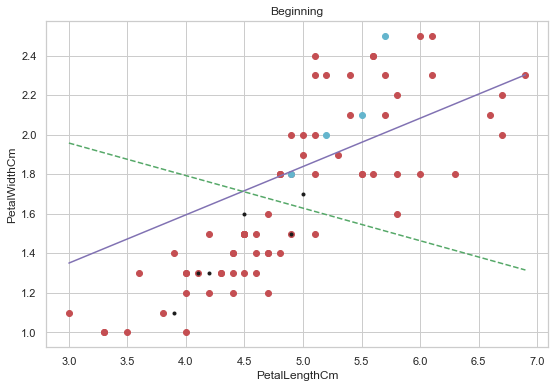

In [55]:
train_indexes = list(range(10))  # 첫 10개 데이터 훈련
unknown_indexes = list(range(10, 80)) # 나머지 70개 레이블링 안된 데이터로 지정
X_train_new = X_train.iloc[train_indexes]
y_train_new = y_train.iloc[train_indexes]

clf = LinearSVC()
clf.fit(X_train_new, y_train_new)

folder = 'rs2it20/'

try:
    os.mkdir(folder)
except:
    pass

filenames = ['ActiveLearningTitleSlide2.jpg'] * 2

title = "Beginning"
name = folder + ("rs2it20_0a.jpg")
plot_svm(clf, train_indexes, unknown_indexes, False, title, name)

filenames.append(name)

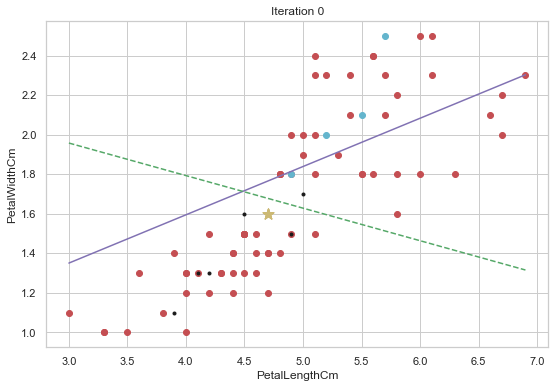

In [56]:
n = find_most_ambiguous(clf, unknown_indexes)
unknown_indexes.remove(n)

title = "Iteration 0"
name = folder + ("rs1it5_0b.jpg")
# name = folder + ("rs2it20_0b.jpg")
filenames.append(name)
plot_svm(clf, train_indexes, unknown_indexes, n, title, name)

https://towardsdatascience.com/active-learning-5b9d0955292d